In [5]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [18]:
SIMPLE_MOVEMENT # These are the simple movements that we can use

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [19]:
env.observation_space.shape # This is the shape of the observation space

(240, 256, 4)

In [5]:
env.action_space

Discrete(7)

In [25]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [21]:
done = True
for step in range(100000):
# Start the game to begin with
    if done:
        env.reset()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    done = terminated or truncated
    env.render()
env.close()

c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [22]:
env.close() # Close the environment

In [26]:
env.reset() # Reset the environment

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [11]:
env.step(1)

c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [27]:
len(env.step(1))

5

### Preprocess the Env

In [52]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [74]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True)

# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscale
env = GrayScaleObservation(env)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [75]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

In [76]:
state = env.reset()

In [77]:
state


array([[[  0,   0,   0, ..., 140, 140, 140],
        [  0,   0,   0, ..., 140, 140, 140],
        [  0,   0,   0, ..., 140, 140, 140],
        ...,
        [  0,   0,   0, ..., 124, 124,   0],
        [  0,   0,   0, ..., 124,   0,   0],
        [  0,   0,   0, ...,   0,   0, 124]]], dtype=uint8)

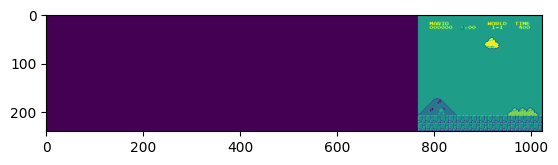

In [79]:
plt.imshow(state[0])

In [80]:
state, reward, done, info = env.step([5])

c:\Users\Isara Liyanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

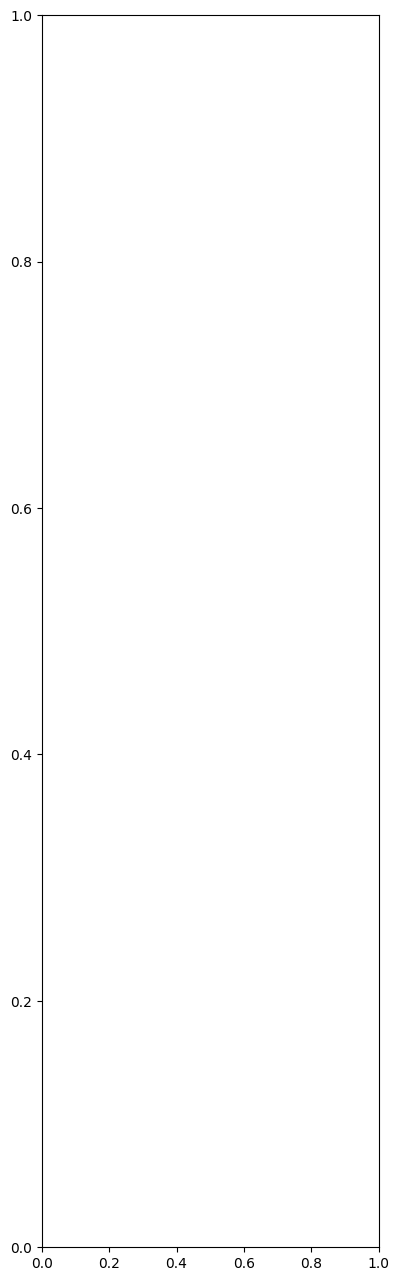

In [83]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[1]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()